In [1]:
%matplotlib inline

# 用Keras生成简单神经网络完成手写体识别

根据 **Author: Xavier Snelgrove** 翻译 

多伦多大学的简短Keras的手写体神经网络识别教程。 主要基于Keras源代码中的  `mnist_mlp.py` 案例

## 安装先决条件

参考以下顺序安装相关软件

### 安装Python

   Python3.6.x以下。 如果你安装了Python3.7，请删除，重新安装Python3.6

### 配置虚拟环境

    pip install virtualenv

    cd ~

    virtualenv kerasenv

windows下运行cmd，切换到虚拟环境

     kerasenv\Scripts\activate.bat
    
然后安装以下的包

    pip install numpy jupyter keras matplotlib tensorflow
    

## 启动jupyter


    jupyter notebook

## 测试运行环境，运行后面的程序

请先切换到虚拟环境

kerasenv\Scripts\activate.bat

然后运行

jupyter notebook




In [53]:
import tensorflow as tf


## 开始建造神经网络

先导入一些必要的包

In [54]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## 导入训练数据

In [55]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


# 看一看训练用的数据长什么样

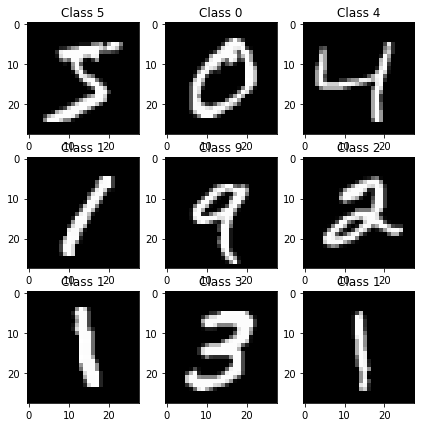

In [56]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## 练习：修改一下显示方式和数量

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


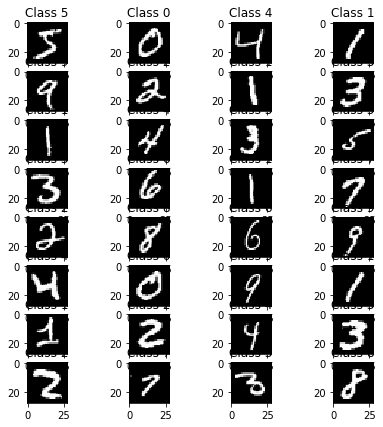

In [57]:
for line in X_train[0]:
    linestr=''
    for dot in line:
        linestr+=str(dot)+' '
    print(linestr) 

for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

print(y_train)

## 数据格式整理

将28x28的图像变成单784的向量. 将输入归一化为0和1之间而不是0到255之间

In [58]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## 重新打印一下整理过的第一个字符数据看看效果

In [59]:
#print(X_train[0])

linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "




0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0

Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [60]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# 建造神经元网络

简单3层全互联网络

<img src="figure.png" />

In [61]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## 编译模型

Keras建立在在Theano (也在TensorFlow)之上, 用Python定义计算图，然后编译为在CPU或GPU上高效运行的代码。

在编译时，Keras让你定义损失函数和优化器。我们这里用的损失函数称为 *categorical crossentropy*, 非常适合比较两个概率分布

我们预测10个数字的概率分布，(例如 我们80%确信图像为3, 10%确信是8, 5% 是2), 目标是正确的覆盖100%概率，0%则是其它

优化器帮助决定模型学习速度，如何抗拒粘滞或吹大。我们不在此讨论细节。一般用adam优化即可。

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## 训练模型！

This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [63]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 261us/step - loss: 0.2529 - val_loss: 0.1005
Epoch 2/4
60000/60000 [==============================] - 15s 257us/step - loss: 0.1021 - val_loss: 0.0839
Epoch 3/4
60000/60000 [==============================] - 15s 248us/step - loss: 0.0719 - val_loss: 0.0667
Epoch 4/4
60000/60000 [==============================] - 15s 256us/step - loss: 0.0562 - val_loss: 0.0610


## 最后，评估性能

In [1]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

NameError: name 'model' is not defined

### 检查输出

看看正确的和错误的样本

In [65]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

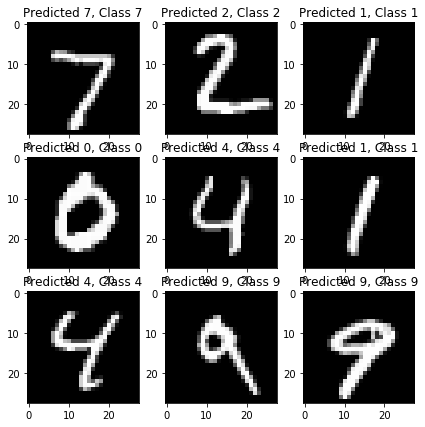

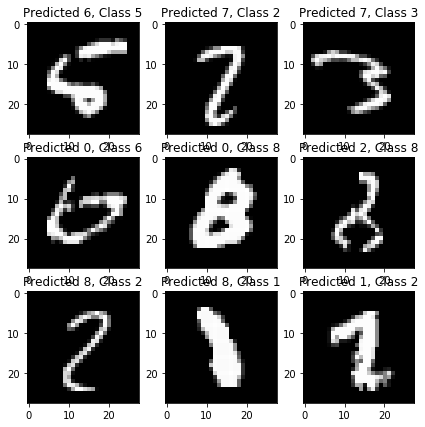

In [66]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras